In [10]:
from src.clean_data import get_cleaned_data

df = get_cleaned_data()
df

cleaning data...
removing 17 rows with price >= 150000...
removing 25 rows with invalid district...
final length: 397


,url,last_update,price,district,bag_of_words,neubau,area,rooms,needs_fix
0,https://www.willhaben.at/iad/immobilien/d/eige...,2024-03-29 21:45:00,149900.0,1090,ehemalige hausbersorgerwohnung in u-bahn nähet...,False,30.04,1.0,True
1,https://www.willhaben.at/iad/immobilien/d/eige...,2024-04-03 13:57:00,129001.0,1100,tolle studentenwohnung- wohnen im herzen favor...,True,32.11,1.0,None
2,https://www.willhaben.at/iad/immobilien/d/eige...,2024-03-11 10:43:00,115000.0,1020,preiswerte zentrumsnahe altbaugarconniere mit ...,False,29.00,1.0,True
4,https://www.willhaben.at/iad/immobilien/d/eige...,2024-04-01 09:55:00,110000.0,1210,# sq -sanierungsbedürftige helle 1 zimmer woh...,False,31.31,1.0,False
5,https://www.willhaben.at/iad/immobilien/d/eige...,2024-04-01 07:04:00,112000.5,1160,leistbares wohnen - charmante altbauwohnung na...,False,28.08,1.0,False
...,...,...,...,...,...,...,...,...,...
433,https://www.willhaben.at/iad/immobilien/d/eige...,2024-04-05 09:25:00,104000.0,1100,sanierungsbedürftige wohnung im 3. og in zentr...,None,30.41,1.0,None
434,https://www.willhaben.at/iad/immobilien/d/eige...,2024-04-02 12:19:00,127000.0,1200,schicke kleine wohnung in hervorragender lagew...,False,NaN,1.0,None
436,https://www.willhaben.at/iad/immobilien/d/eige...,2024-04-04 13:56:00,129000.0,1110,perfekte starterwohnung in zentraler lage - 1 ...,True,NaN,1.0,False
437,https://www.willhaben.at/iad/immobilien/d/eige...,2024-03-12 09:37:00,149000.0,1090,ideales investment für anleger oder selbstnutz...,False,32.00,1.0,False


# choose best

remove:

- sanierungsbedürftig
- untervermietet

good:

- sonnig
- südseitig


In [11]:
import webbrowser

for i in range(len(df)):
    row = df.iloc[i]
    url = row["url"]

    needs_fix = row["needs_fix"]
    if (needs_fix is not None) and (needs_fix == False):
        print("Skipping", url)
        continue

    # print(needs_fix)


Skipping https://www.willhaben.at/iad/immobilien/d/eigentumswohnung/wien/wien-1210-floridsdorf/-sq-sanierungsbeduerftige-helle-1-zimmer-wohnung-in-1210-wien-765428488/
Skipping https://www.willhaben.at/iad/immobilien/d/eigentumswohnung/wien/wien-1160-ottakring/leistbares-wohnen-charmante-altbauwohnung-nahe-u3-ottakring-beliebte-lage-1489883693/
Skipping https://www.willhaben.at/iad/immobilien/d/eigentumswohnung/wien/wien-1140-penzing/fruehlingsaktion-preisredukton-erstbezug-nach-neubau-o-kernsanierung-i-grosszuegige-aussenflaechen-i-durchdachte-raumkonzepte-i-u-bahn-u3-naehe-i-2098758985/
Skipping https://www.willhaben.at/iad/immobilien/d/eigentumswohnung/wien/wien-1150-rudolfsheim-fuenfhaus/home-4-1-single-schmuckstueck-kernsaniert-ubahn-naehe-660215211/
Skipping https://www.willhaben.at/iad/immobilien/d/eigentumswohnung/wien/wien-1160-ottakring/freundliche-mini-wohnung-mit-niedrigen-betriebskosten-und-sehr-guter-infrastruktur-naehe-u-bahn-733452343/
Skipping https://www.willhaben.at/

# explore data

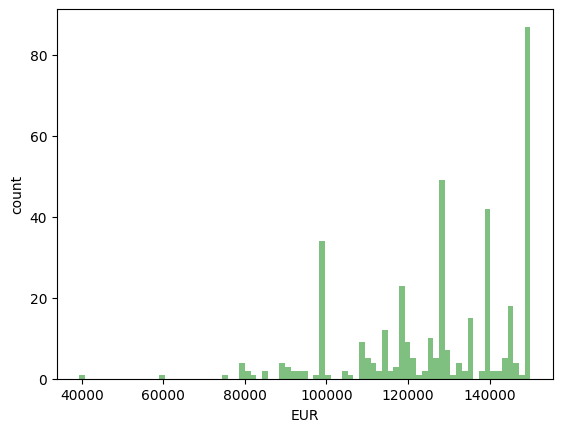

In [12]:
# price distribution

import matplotlib.pyplot as plt

num_bins = len(df) // 5
plt.hist(df["price"], bins=num_bins, color="green", alpha=0.5) 
plt.xlabel("EUR")
plt.ylabel("count")
plt.show()

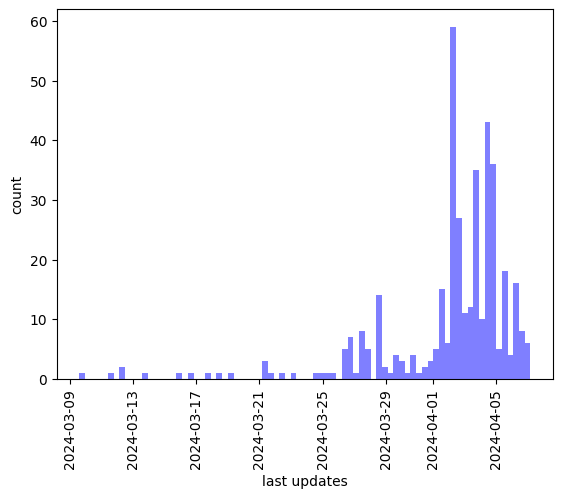

In [13]:
# update distribution

num_bins = len(df) // 5
plt.hist(df["last_update"], bins=num_bins, color="blue", alpha=0.5)

plt.xticks(rotation=90)
plt.ylabel("count")
plt.xlabel("last updates")
plt.show()